Analysis Test
========

Since the energy discrepancy doesn't have a solution currently, the analysis will progress assuming that the energies are correct and just treating the peaks as peaks. First, we need to look at the yields from our strips normalized to the run time and current. Run time is stored in `run_information`, while the current needs to be taken from the log book.

The total accumulated charge is $It$, where $I$ is the current in $\mu$A and $t$ is the time in seconds, giving a total accumulated charge in $\mu$C.

For `pyne` version > 0.3, more information about the runs will be stored within the `meta.json` file. Since the entire project hasn't be extended to this point yet, right now I am still using the HDF5 files.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import pyne
import sap
pyne.__version__, sap.__version__

('0.5.1', '2017-04-21')

In [2]:
r1_runs = [264, 270, 277, 282, 288]
r1_field = [1693.3, 1690.4, 1687.1, 1683.9, 1680.1]  # G
r1_p_energy = [1.3741, 1.3694, 1.3640, 1.3589, 1.3528]  # MeV
r1_a_energy = [2.7807, 2.7761, 2.7709, 2.7659, 2.7599]  # MeV

r2_runs = [248, 255, 260, 234, 241]
r2_field = [1580.8, 1577.5, 1574.6, 1571.4, 1567.9]  # G
r2_p_energy = [1.1976, 1.1926, 1.1882, 1.1834, 1.1781]  # MeV
r2_a_energy = [2.6089, 2.6040, 2.5997, 2.5950, 2.5899]  # MeV

runs = [*r1_runs, *r2_runs]
field = [*r1_field, *r2_field]
p_energy = [*r1_p_energy, *r2_p_energy]
a_energy = [*r1_a_energy, *r2_a_energy]
len(runs), runs

(10, [264, 270, 277, 282, 288, 248, 255, 260, 234, 241])

In [3]:
# current taken from logbook
r1_current = [2.75, 2.6, 2.7, 2.5, 2.35]  # Note: subtract 360 s from run 288's time due to cup being in
r2_current = [2.3, 1.9, 2.5, 2.0, 2.5]
current = np.array([*r1_current, *r2_current])

In [4]:
data = [pyne.EVTData('../data_np/run{}'.format(n), '../data/run{}-13328.evt'.format(n)) for n in runs]
for data_obj in data:
    data_obj.load_data()
#     print(data_obj.adc[16].energies)

reading from ../data_np/run264...
reading from ../data_np/run270...
reading from ../data_np/run277...
reading from ../data_np/run282...
reading from ../data_np/run288...
reading from ../data_np/run248...
reading from ../data_np/run255...
reading from ../data_np/run260...
reading from ../data_np/run234...
reading from ../data_np/run241...


In [5]:
cal_data = pyne.EVTData('../data_np/run289')
cal_data.load_data()

cal = sap.Calibrator(cal_data)
cal.calibrate(data[0])
# data[0].adc[16].energies

reading from ../data_np/run289...
writing to ../data_np/run264...


In [6]:
time = np.array([d.run_information['run_time'] for d in data])
time[4] -= 360  # correction for cup in time
time

array([  910.,   906.,   989.,  3182.,  7996.,  5455.,   907.,   907.,
        1078.,  7103.])

In [7]:
charge = 1e-6 * current * time  # C
incident_particles = charge / 1.6e-19
incident_particles

array([  1.56406250e+16,   1.47225000e+16,   1.66893750e+16,
         4.97187500e+16,   1.17441250e+17,   7.84156250e+16,
         1.07706250e+16,   1.41718750e+16,   1.34750000e+16,
         1.10984375e+17])

In [8]:
(incident_particles * 1.6e-19).sum(), charge.sum()

(0.070724800000000004, 0.070724800000000004)

In [9]:
for t, c, ip, pe, ae, i, data_obj in zip(time, charge, incident_particles, p_energy, a_energy, current, data):
    f = data_obj.f
    f.add_attribute(run_time=float(t), charge=float(c), incident_particles=float(ip),
                    E_proton=float(pe), E_alpha=float(ae), current=float(i))

In [10]:
!cat ../data_np/run270/meta.json

{
    "run_time": 906.0,
    "title": "Al27_pa_E=1.369MeV_final_TuningSheet_191",
    "incident_particles": 1.4722500000000002e+16,
    "start_time": "2017-02-28T07:49:18",
    "run_number": 270,
    "current": 2.6,
    "E_proton": 1.3694,
    "E_alpha": 2.7761,
    "charge": 0.0023556000000000002,
    "end_time": "2017-02-28T08:04:24"
}

In [11]:
incident_particles[np.argmin(time)] * 1.6e-19, incident_particles[np.argmax(time)] * 1.6e-19

(0.0023556000000000002, 0.018790600000000001)

Determine Yields
------------------

Since we have our data loaded and run details saved, we can process each run individually to get an idea of what our rough yield values are. First, we'll check with a single run then create something that goes through all of the runs.

In [37]:
run270 = sap.Analyzer(data[1], 'run270')

figsize = (5.75, 4.25)

=== RUN 264 ===
E_p = 1.3741, E_a = 2.7807
 using det adc_19...
adc 16:    95 +/-   9
adc 17:  2262 +/-  47
adc 18: 10909 +/- 104
adc 19: 13779 +/- 117
adc 20: 10734 +/- 103
adc 21:  9082 +/-  95
adc 22:  7931 +/-  89
adc 23:  6952 +/-  83
adc 24:  6384 +/-  79
adc 25:  6800 +/-  82
adc 26:  6286 +/-  79
adc 27:  4192 +/-  64
adc 28:  2265 +/-  47
adc 29:   953 +/-  30
adc 30:   290 +/-  17
adc 31:    63 +/-   7


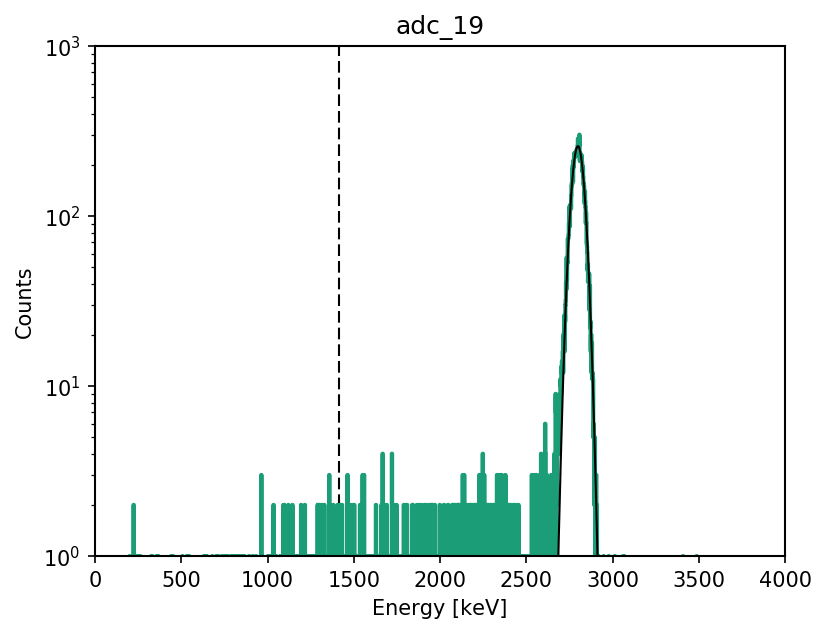

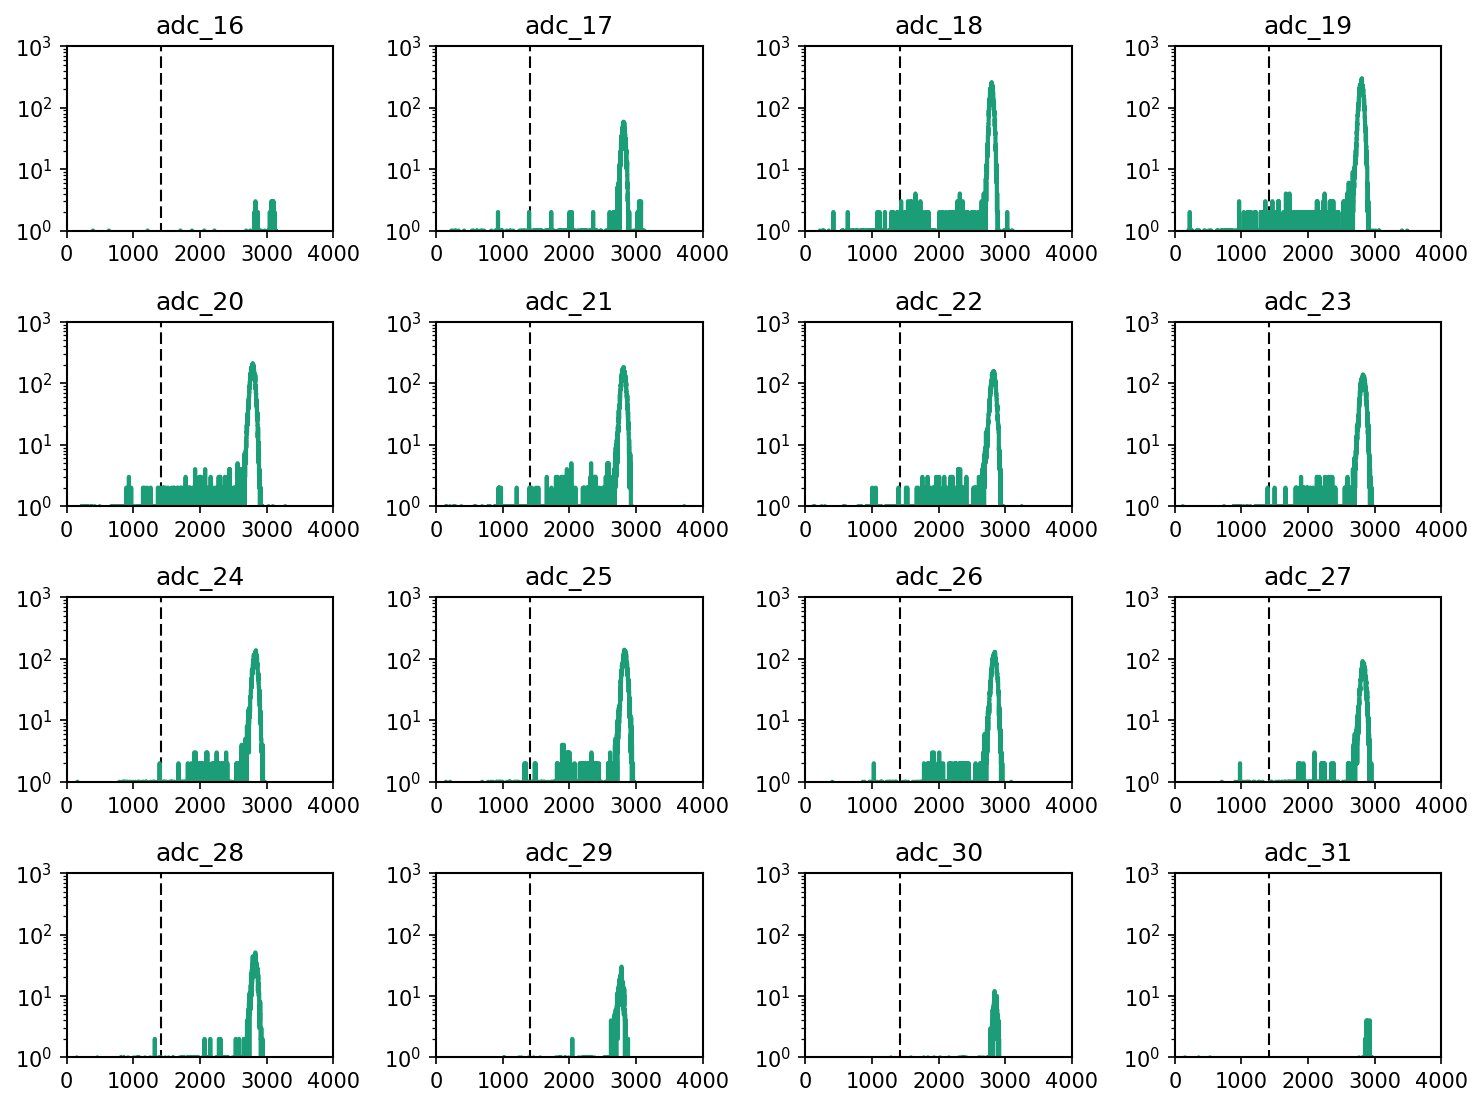

=== RUN 270 ===
E_p = 1.3694, E_a = 2.7761
 using det adc_21...
adc 16:    48 +/-   6
adc 17:    45 +/-   6
adc 18:   312 +/-  17
adc 19:  6495 +/-  80
adc 20: 32389 +/- 179
adc 21: 59337 +/- 243
adc 22: 52108 +/- 228
adc 23: 39977 +/- 199
adc 24: 32311 +/- 179
adc 25: 24006 +/- 154
adc 26: 15921 +/- 126
adc 27:  8504 +/-  92
adc 28:  3712 +/-  60
adc 29:  1209 +/-  34
adc 30:   246 +/-  15
adc 31:    34 +/-   5


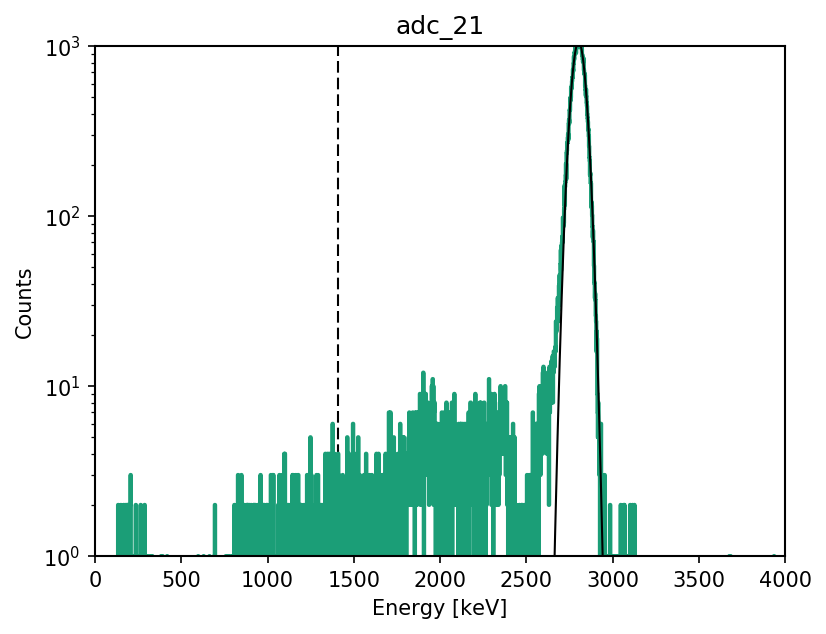

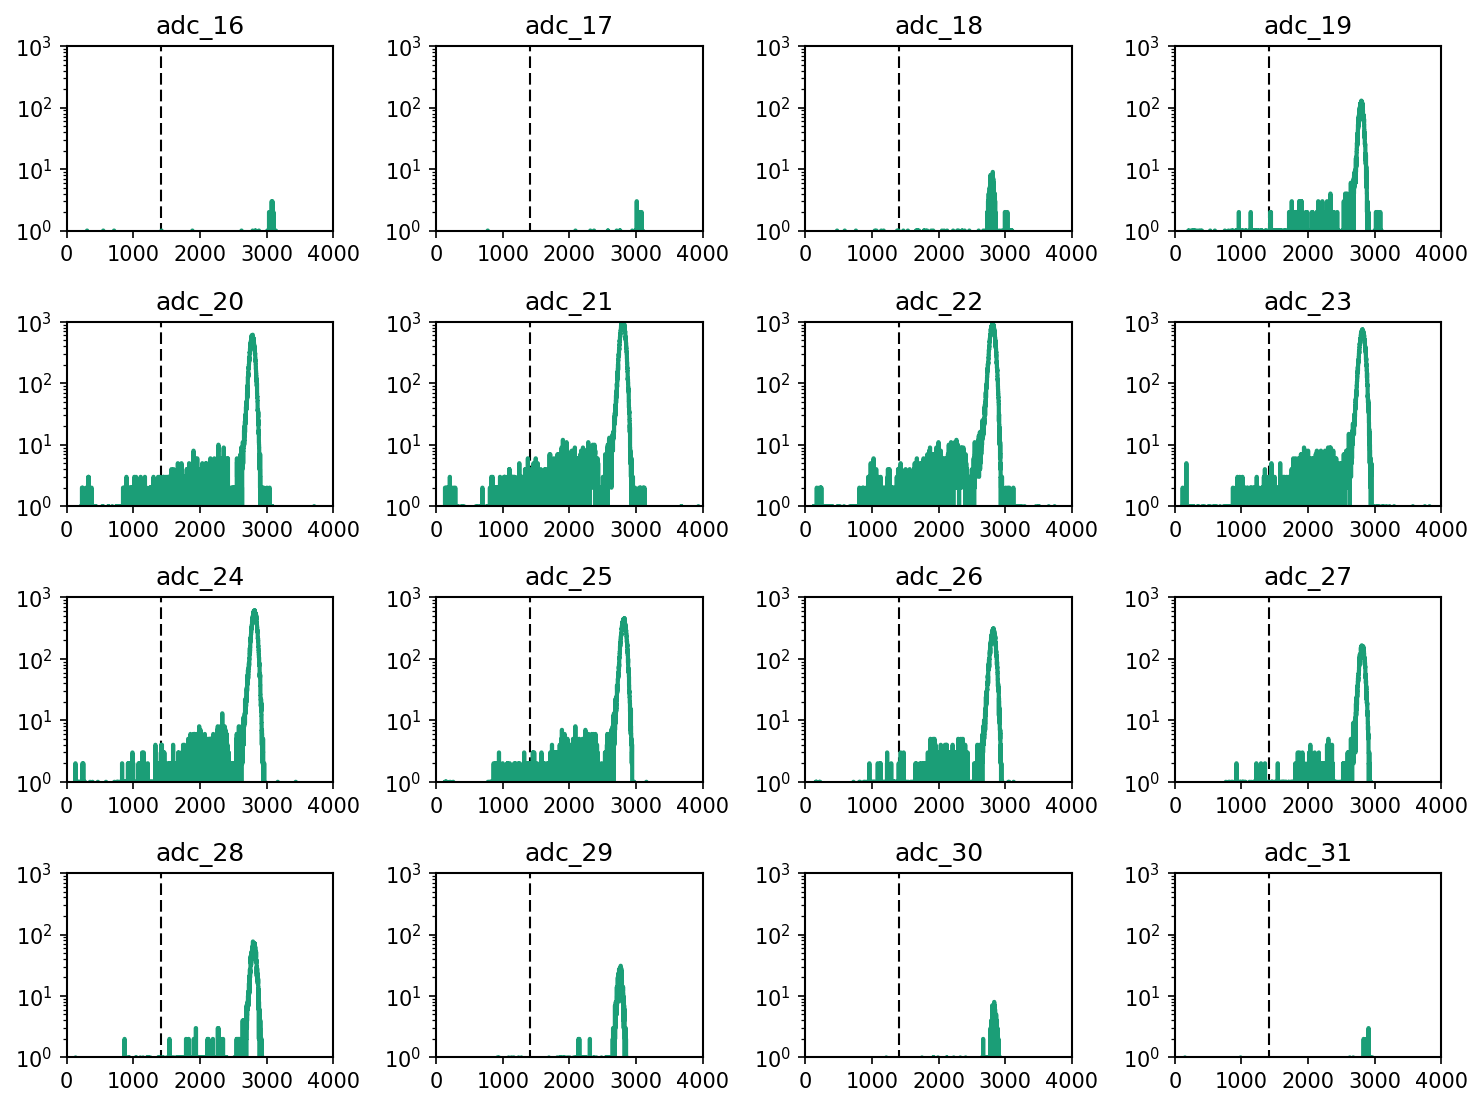

=== RUN 277 ===
E_p = 1.3640, E_a = 2.7709
 using det adc_18...
adc 16:   256 +/-  16
adc 17:  3277 +/-  57
adc 18: 11029 +/- 105
adc 19:  9993 +/-  99
adc 20:  7665 +/-  87
adc 21:  6951 +/-  83
adc 22:  6496 +/-  80
adc 23:  6128 +/-  78
adc 24:  5504 +/-  74
adc 25:  5033 +/-  70
adc 26:  5004 +/-  70
adc 27:  4876 +/-  69
adc 28:  4358 +/-  66
adc 29:  2515 +/-  50
adc 30:   986 +/-  31
adc 31:   256 +/-  16


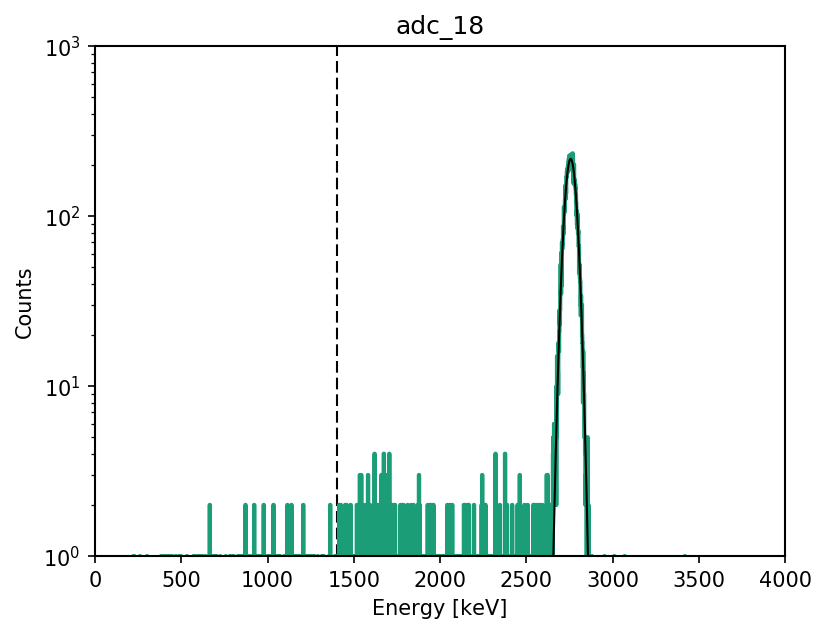

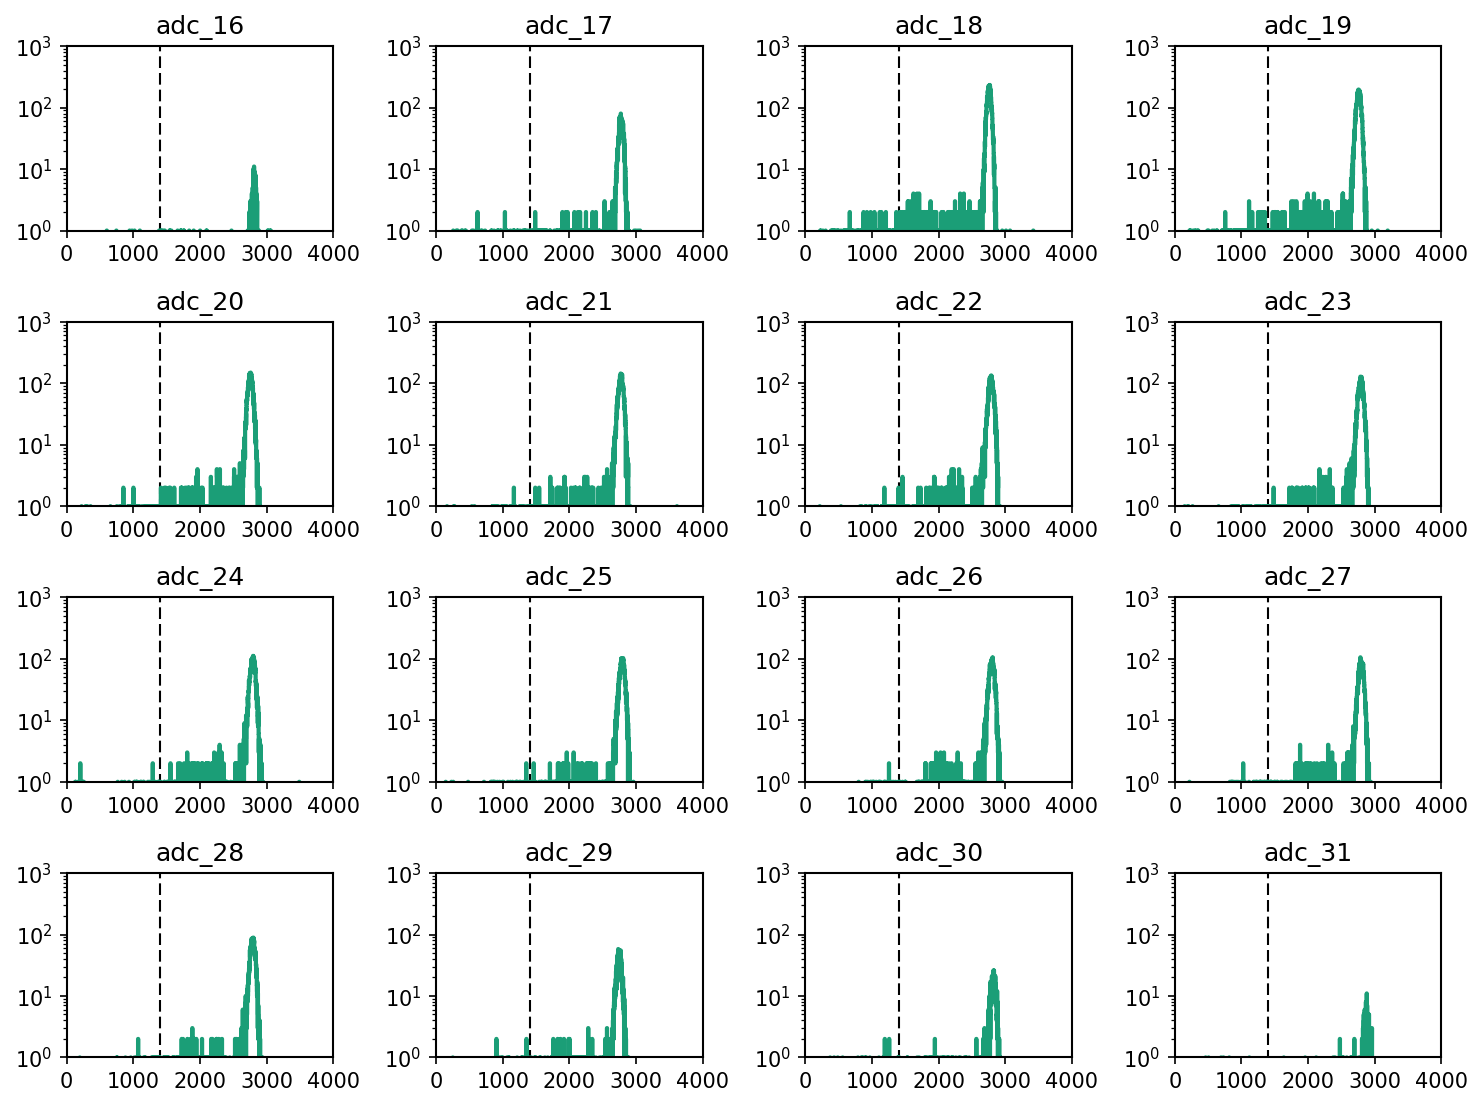

=== RUN 282 ===
E_p = 1.3589, E_a = 2.7659
 using det adc_18...
adc 16:   197 +/-  14
adc 17:  1312 +/-  36
adc 18:  3179 +/-  56
adc 19:  2779 +/-  52
adc 20:  2105 +/-  45
adc 21:  1823 +/-  42
adc 22:  1705 +/-  41
adc 23:  1563 +/-  39
adc 24:  1559 +/-  39
adc 25:  1464 +/-  38
adc 26:  1290 +/-  35
adc 27:  1187 +/-  34
adc 28:   982 +/-  31
adc 29:   507 +/-  22
adc 30:   224 +/-  14
adc 31:    48 +/-   6


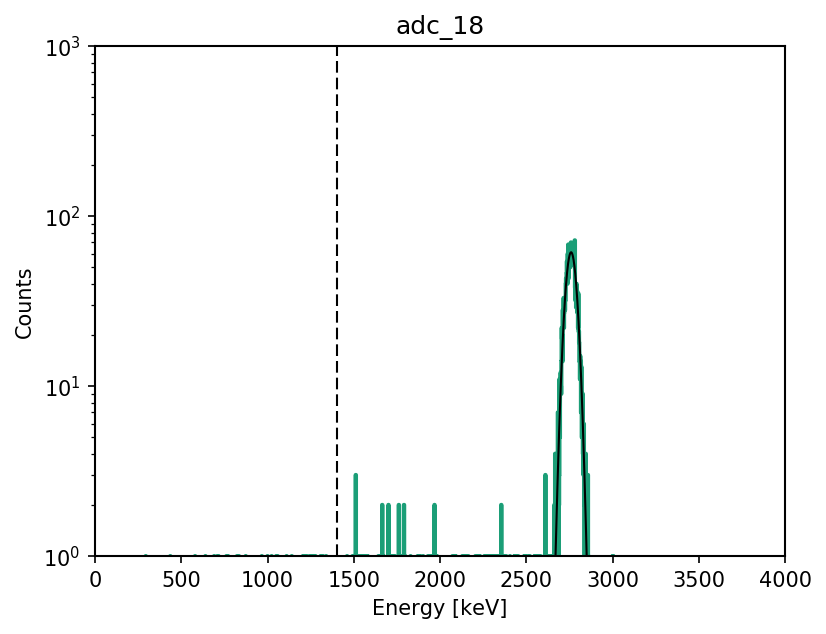

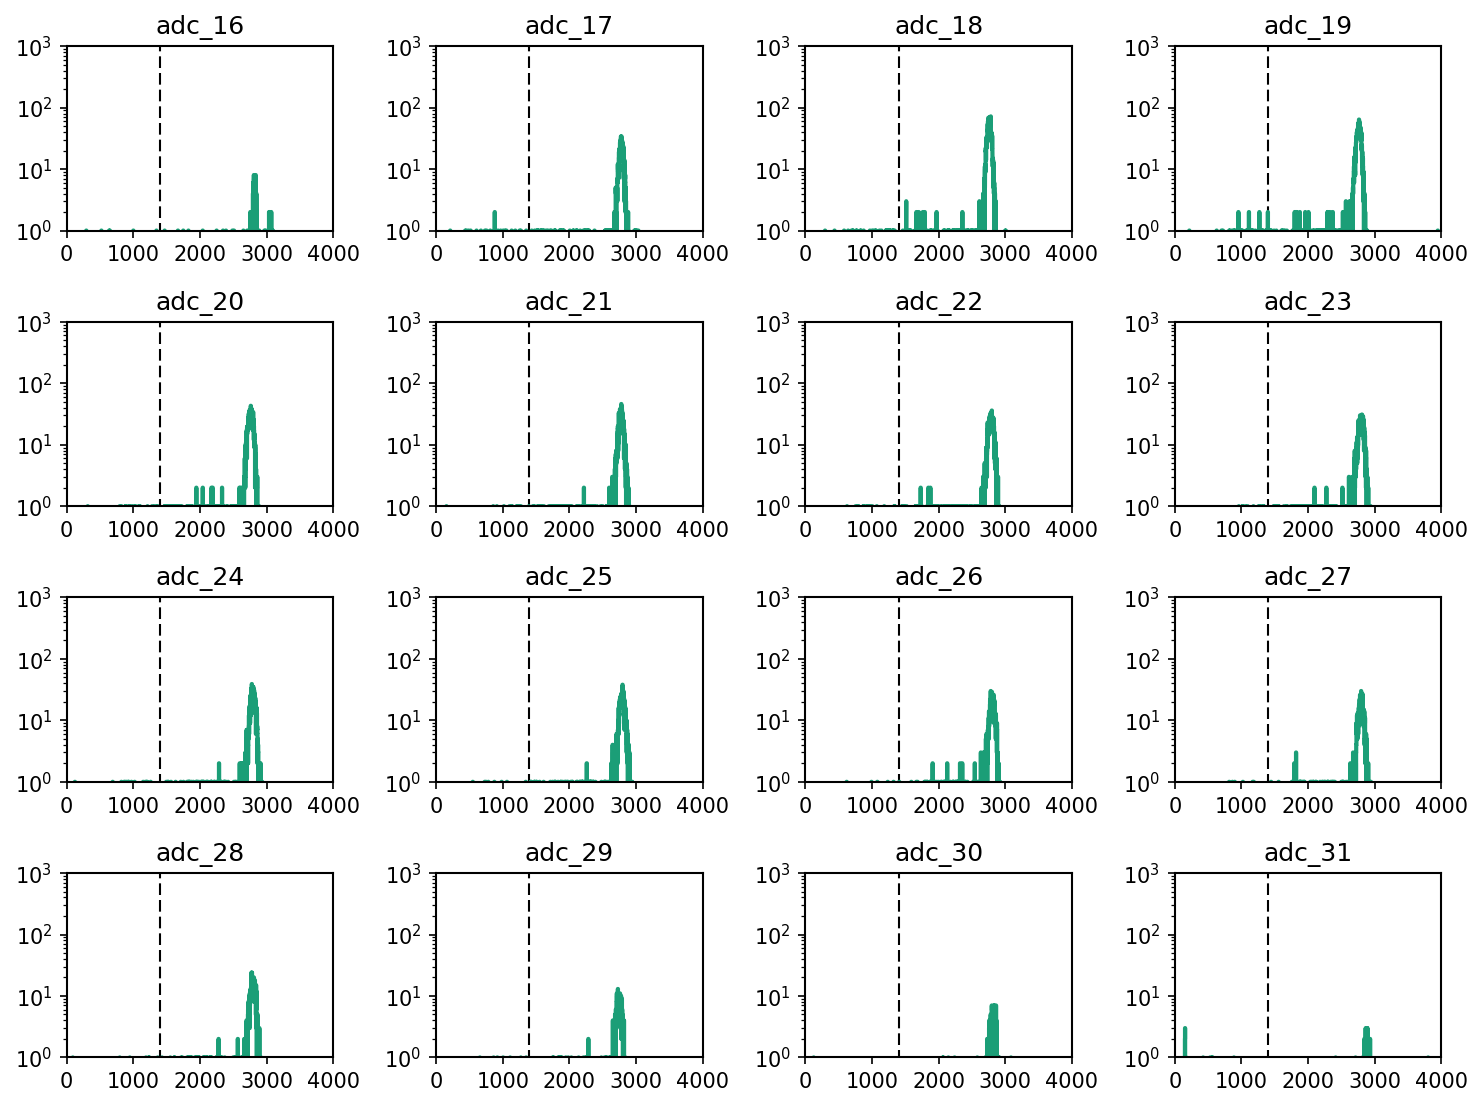

=== RUN 288 ===
E_p = 1.3528, E_a = 2.7599
 using det adc_18...
adc 16:   128 +/-  11
adc 17:   826 +/-  28
adc 18:  2634 +/-  51
adc 19:  3194 +/-  56
adc 20:  2377 +/-  48
adc 21:  1911 +/-  43
adc 22:  1736 +/-  41
adc 23:  1673 +/-  40
adc 24:  1479 +/-  38
adc 25:  1474 +/-  38
adc 26:  1461 +/-  38
adc 27:  1281 +/-  35
adc 28:  1001 +/-  31
adc 29:   672 +/-  25
adc 30:   328 +/-  18
adc 31:   110 +/-  10


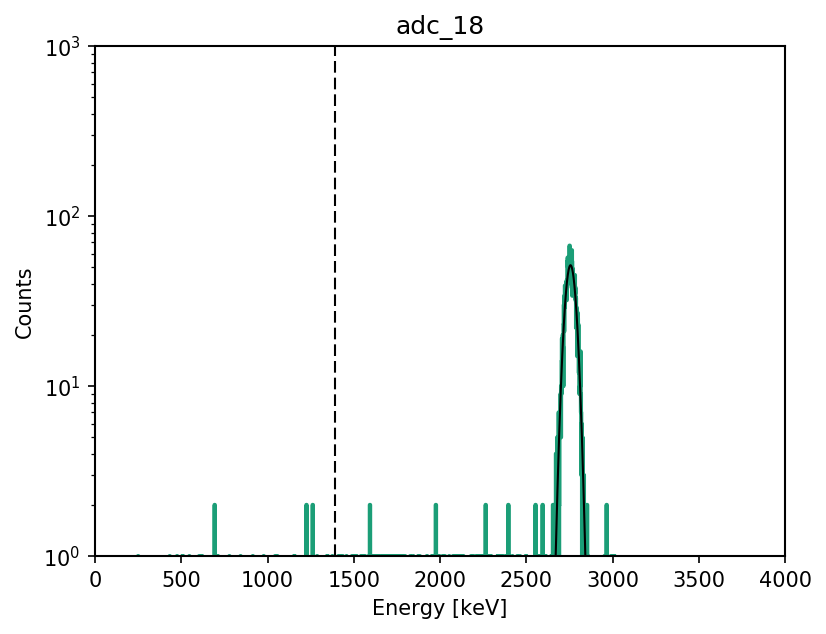

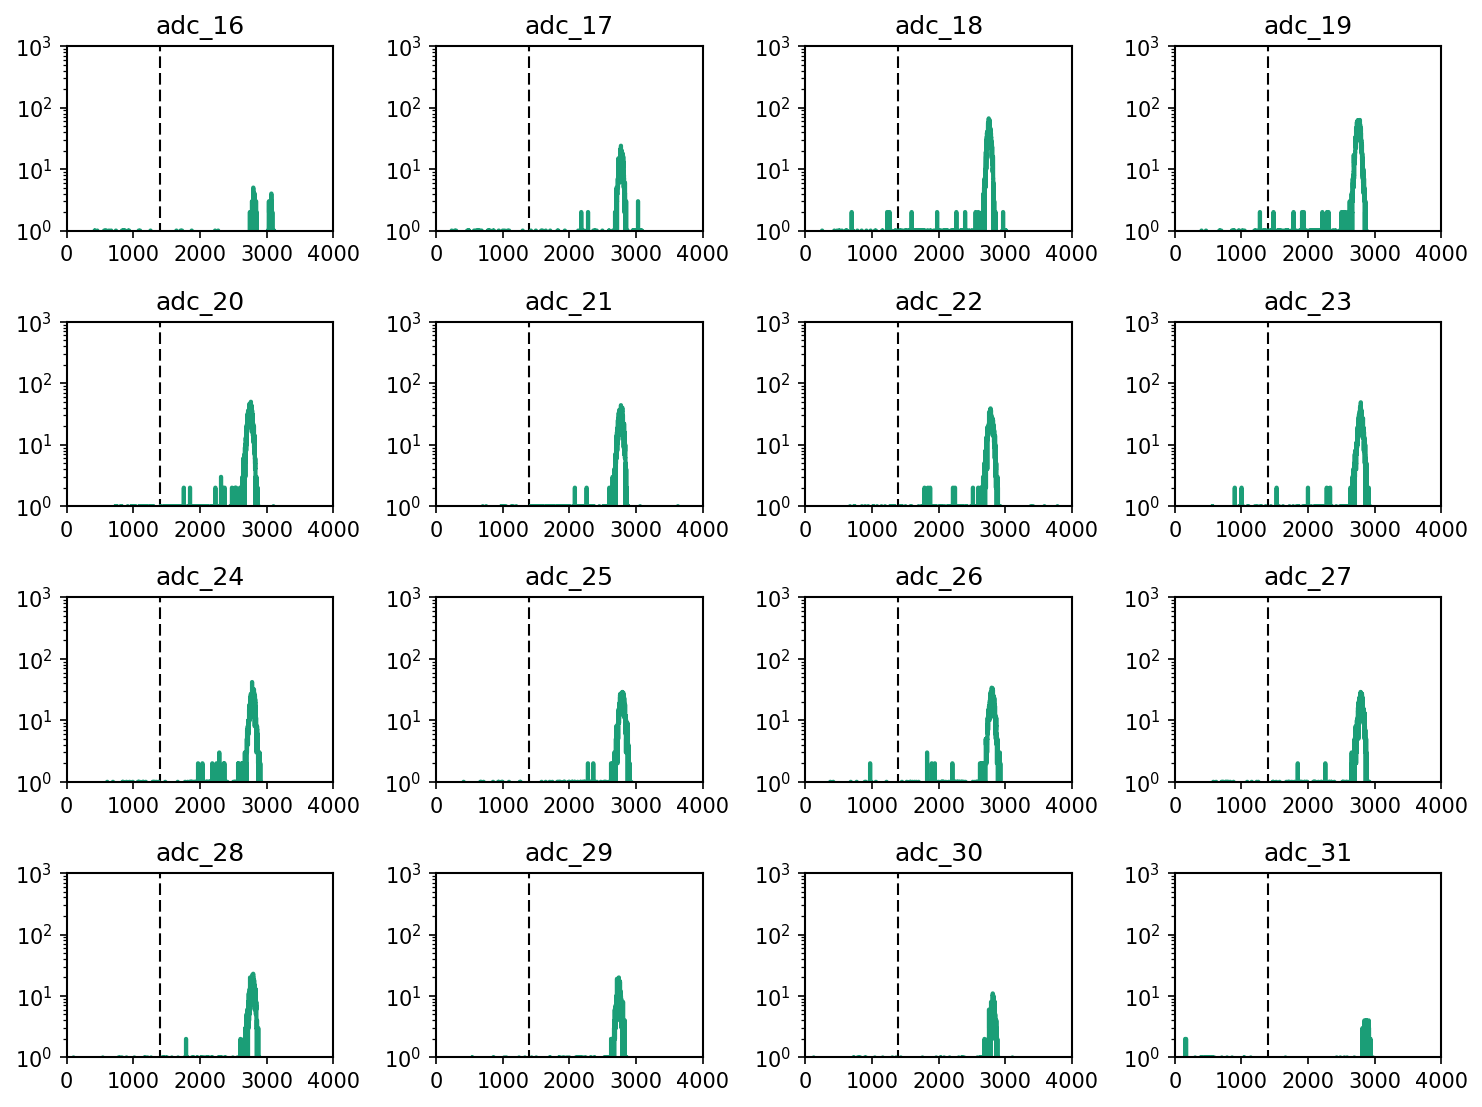

=== RUN 248 ===
E_p = 1.1976, E_a = 2.6089
 using det adc_18...
adc 16:    23 +/-   4
adc 17:  1031 +/-  32
adc 18:  4418 +/-  66
adc 19:  5039 +/-  70
adc 20:  4109 +/-  64
adc 21:  3149 +/-  56
adc 22:  2589 +/-  50
adc 23:  2181 +/-  46
adc 24:  2092 +/-  45
adc 25:  2218 +/-  47
adc 26:  1929 +/-  43
adc 27:  1298 +/-  36
adc 28:   654 +/-  25
adc 29:   256 +/-  16
adc 30:    89 +/-   9
adc 31:    31 +/-   5


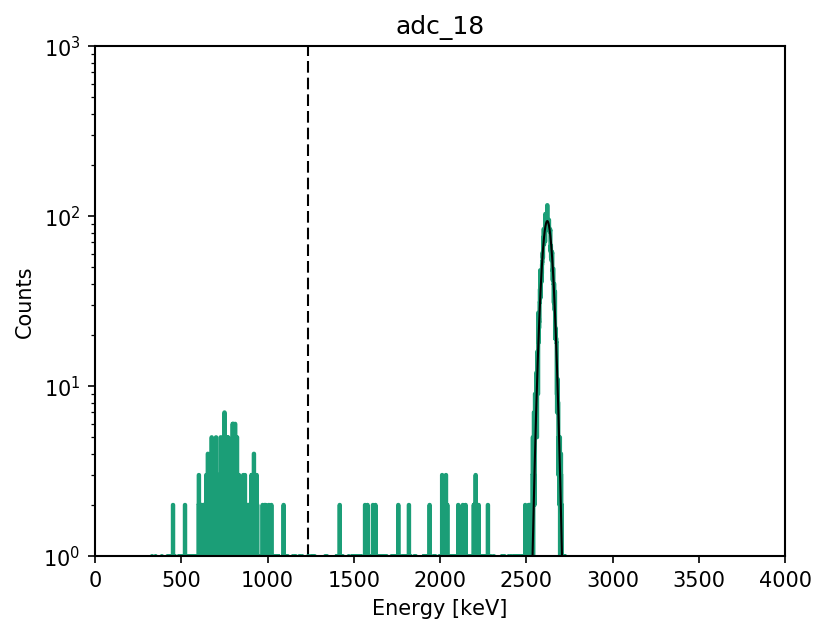

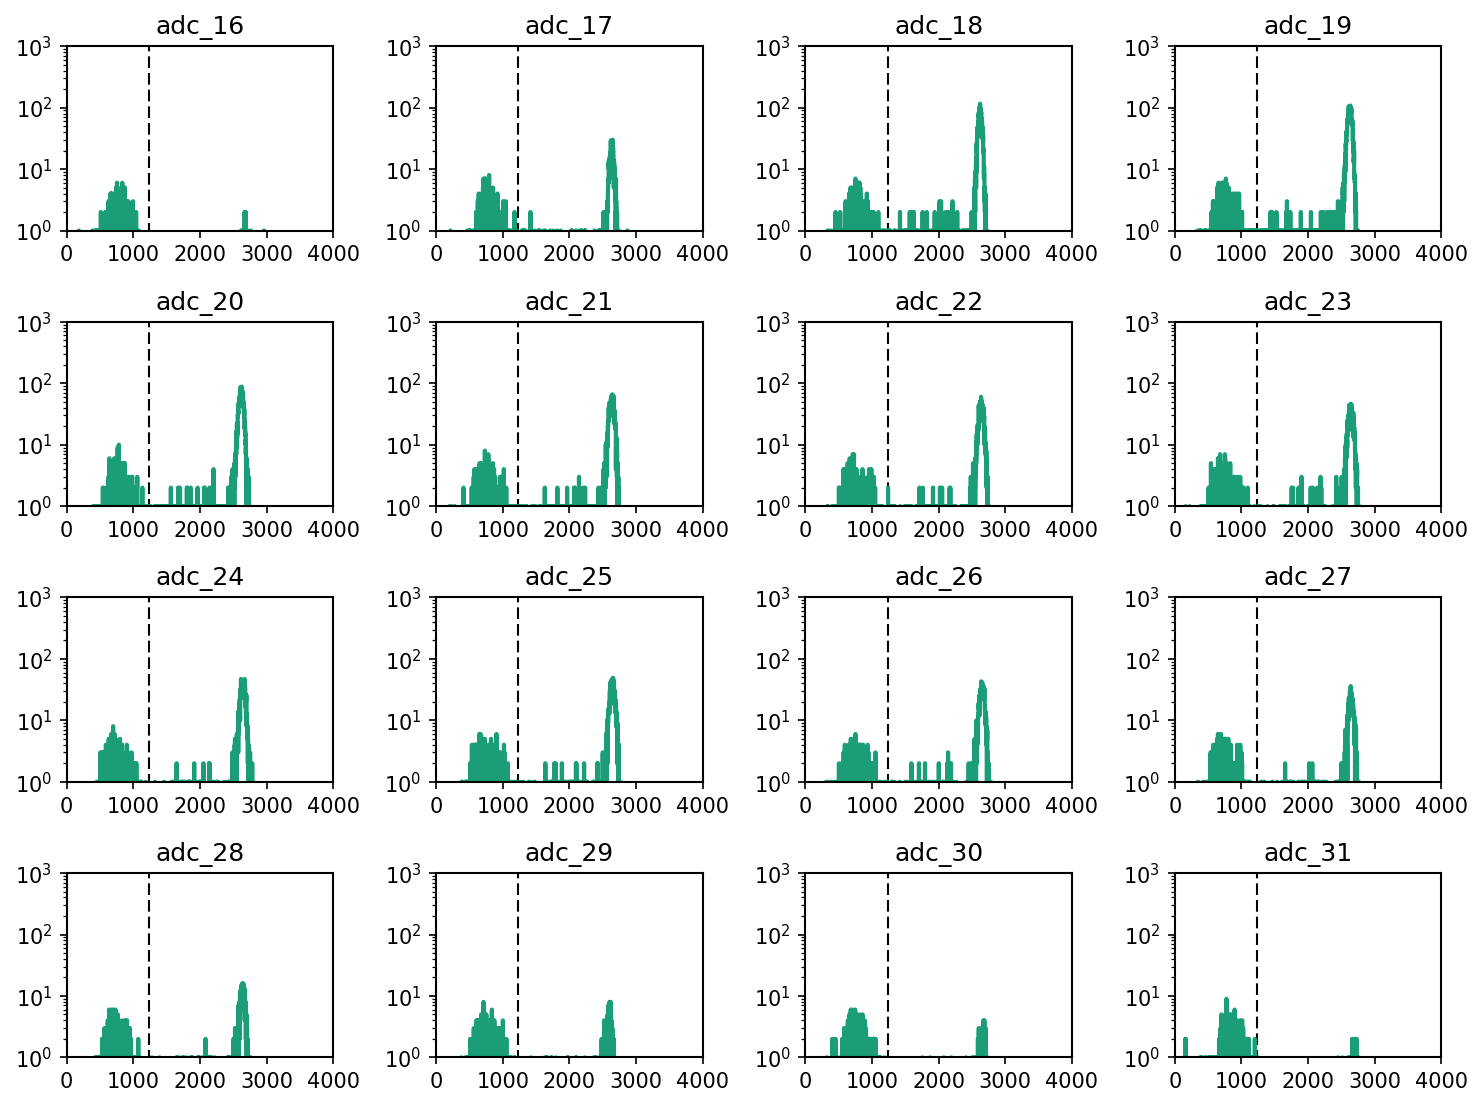

=== RUN 255 ===
E_p = 1.1926, E_a = 2.6040
 using det adc_20...
adc 16:     2 +/-   1
adc 17:     4 +/-   2
adc 18:   239 +/-  15
adc 19:  3506 +/-  59
adc 20:  9383 +/-  96
adc 21:  8748 +/-  93
adc 22:  6994 +/-  83
adc 23:  5637 +/-  75
adc 24:  4949 +/-  70
adc 25:  4305 +/-  65
adc 26:  4142 +/-  64
adc 27:  4359 +/-  66
adc 28:  3900 +/-  62
adc 29:  2646 +/-  51
adc 30:  1385 +/-  37
adc 31:   514 +/-  22


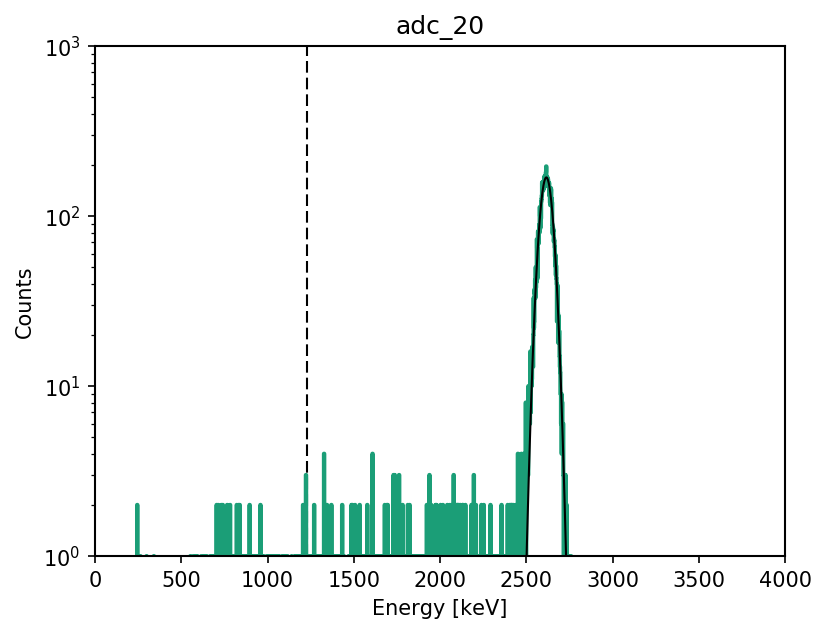

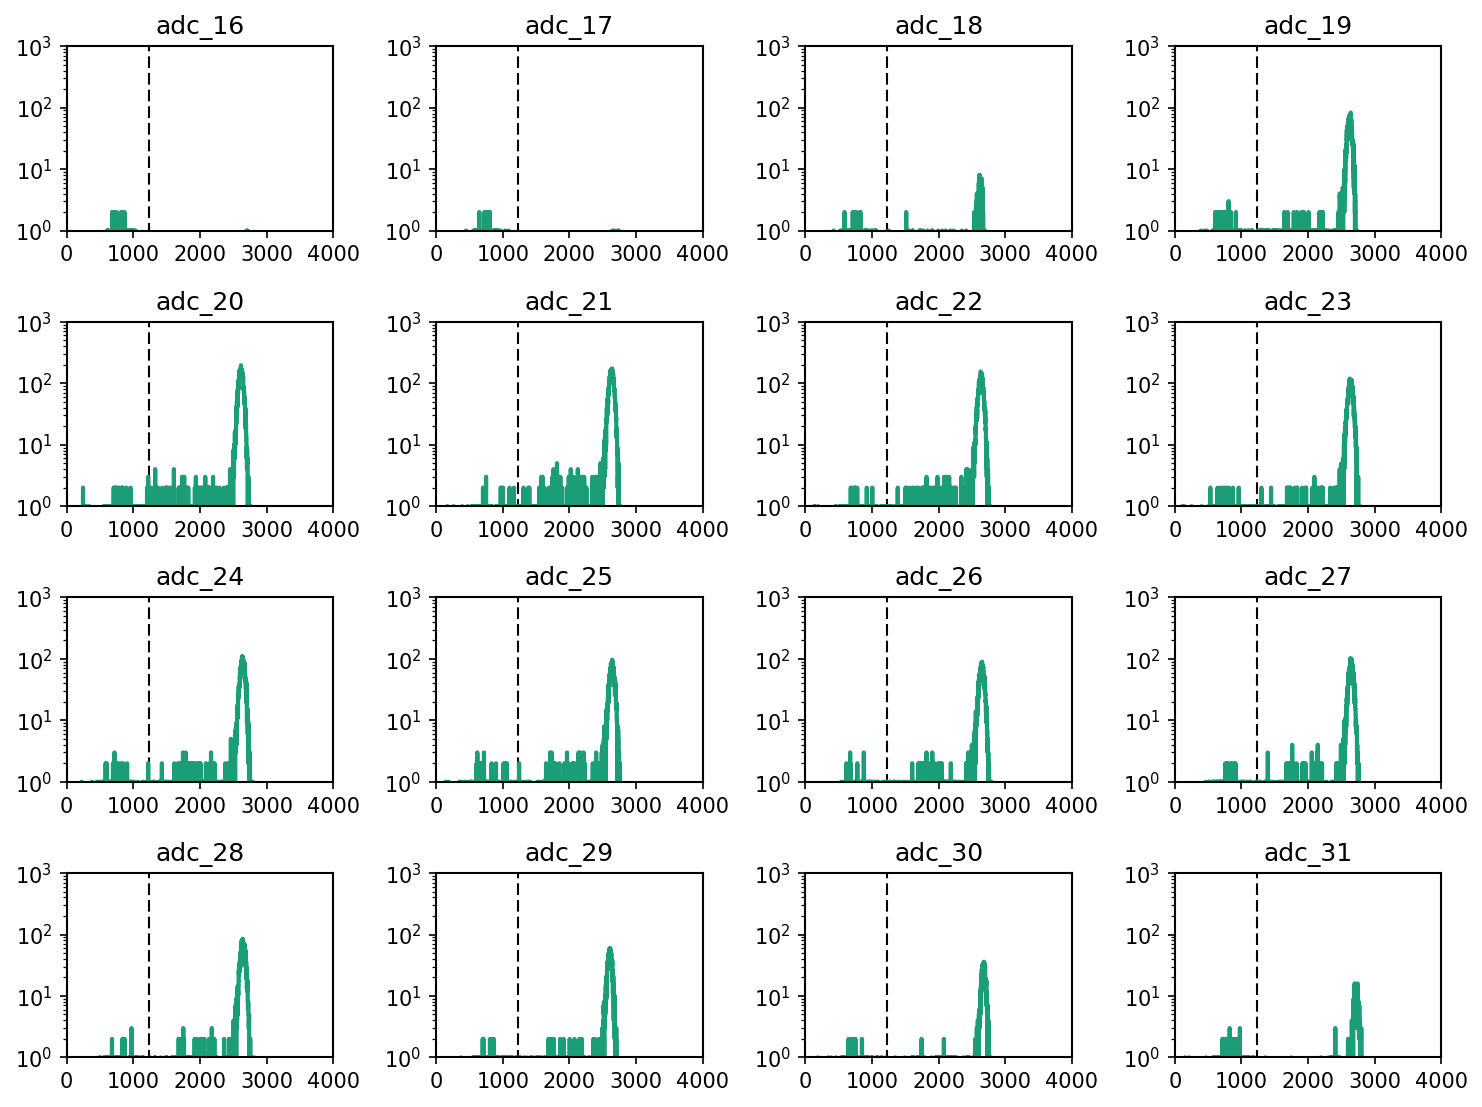

=== RUN 260 ===
E_p = 1.1882, E_a = 2.5997
 using det adc_19...
adc 16:   550 +/-  23
adc 17:  7259 +/-  85
adc 18: 29647 +/- 172
adc 19: 38317 +/- 195
adc 20: 30806 +/- 175
adc 21: 24957 +/- 157
adc 22: 21343 +/- 146
adc 23: 18619 +/- 136
adc 24: 17273 +/- 131
adc 25: 16585 +/- 128
adc 26: 15510 +/- 124
adc 27: 12812 +/- 113
adc 28:  8474 +/-  92
adc 29:  4398 +/-  66
adc 30:  1648 +/-  40
adc 31:   439 +/-  20


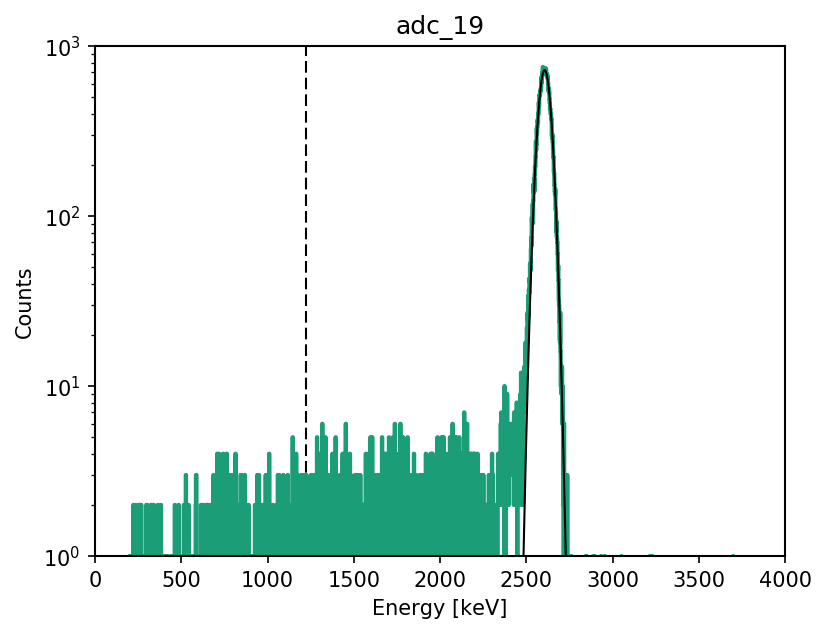

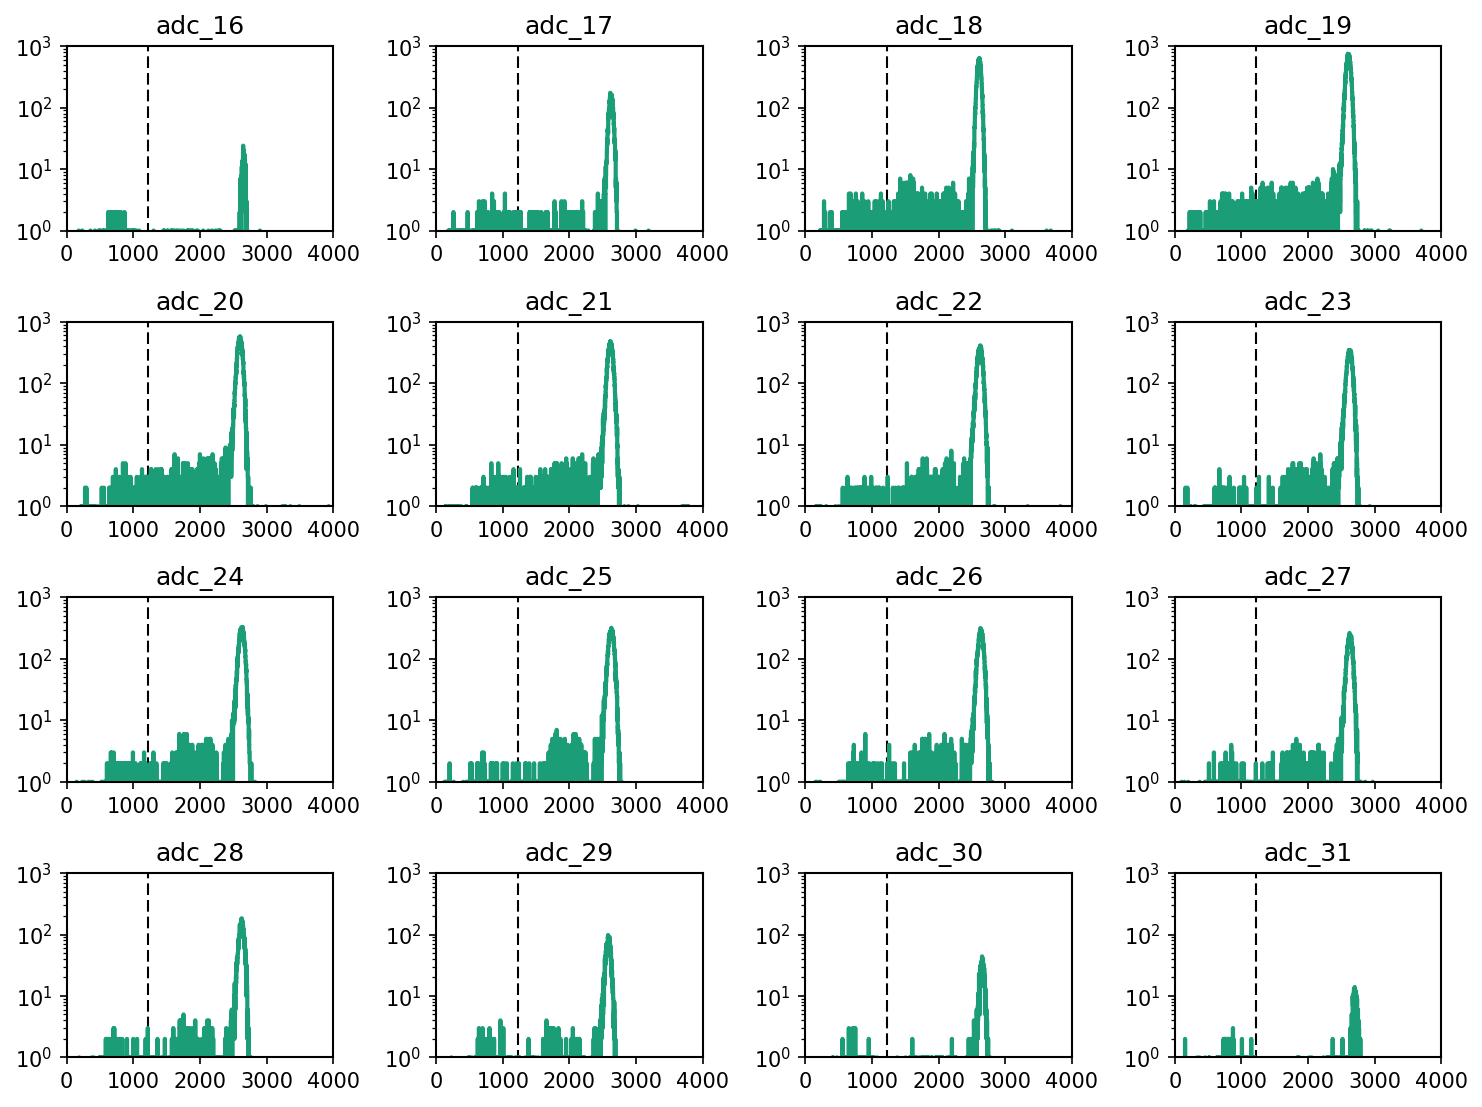

=== RUN 234 ===
E_p = 1.1834, E_a = 2.5950
 using det adc_18...
adc 16:    84 +/-   9
adc 17:   816 +/-  28
adc 18:  2814 +/-  53
adc 19:  2919 +/-  54
adc 20:  2393 +/-  48
adc 21:  2132 +/-  46
adc 22:  1877 +/-  43
adc 23:  1721 +/-  41
adc 24:  1582 +/-  39
adc 25:  1435 +/-  37
adc 26:  1338 +/-  36
adc 27:  1282 +/-  35
adc 28:  1192 +/-  34
adc 29:   810 +/-  28
adc 30:   350 +/-  18
adc 31:   124 +/-  11


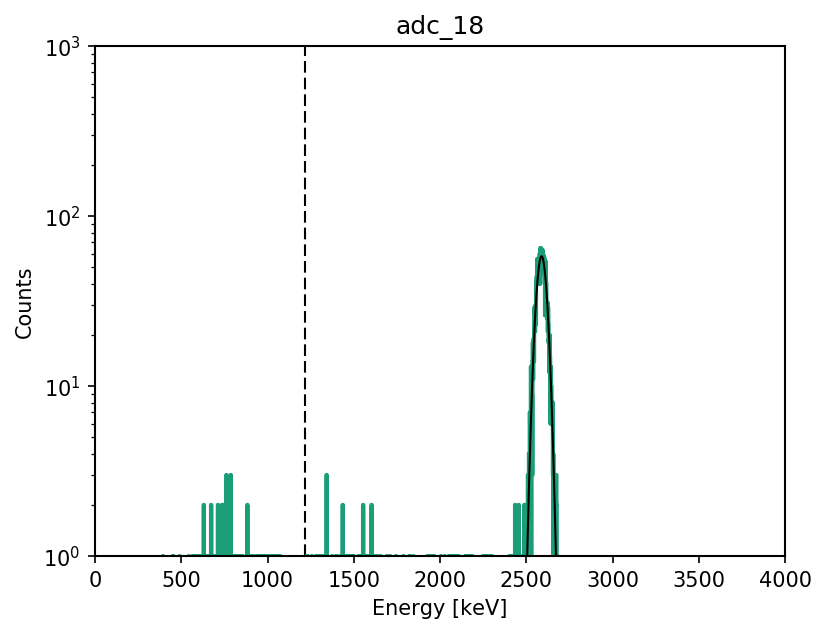

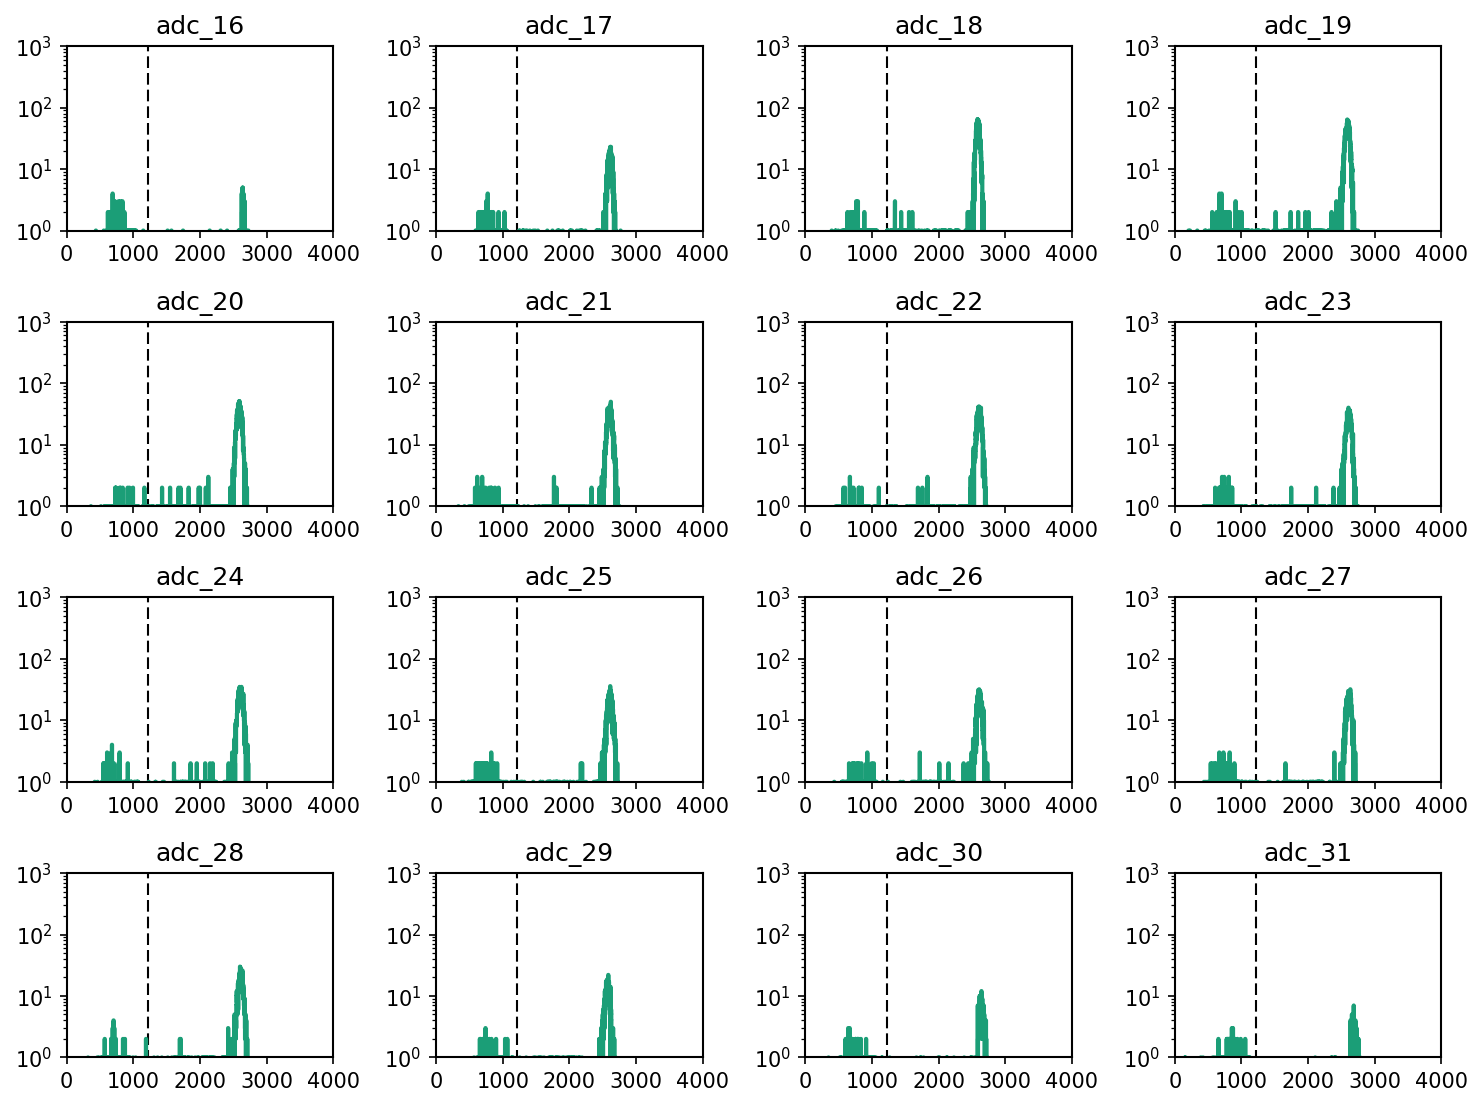

=== RUN 241 ===
E_p = 1.1781, E_a = 2.5899
 using det adc_18...
adc 16:   139 +/-  11
adc 17:  1007 +/-  31
adc 18:  2291 +/-  47
adc 19:  2078 +/-  45
adc 20:  1771 +/-  42
adc 21:  1513 +/-  38
adc 22:  1356 +/-  36
adc 23:  1273 +/-  35
adc 24:  1103 +/-  33
adc 25:   999 +/-  31
adc 26:   920 +/-  30
adc 27:   812 +/-  28
adc 28:   691 +/-  26
adc 29:   404 +/-  20
adc 30:   166 +/-  12
adc 31:    49 +/-   7


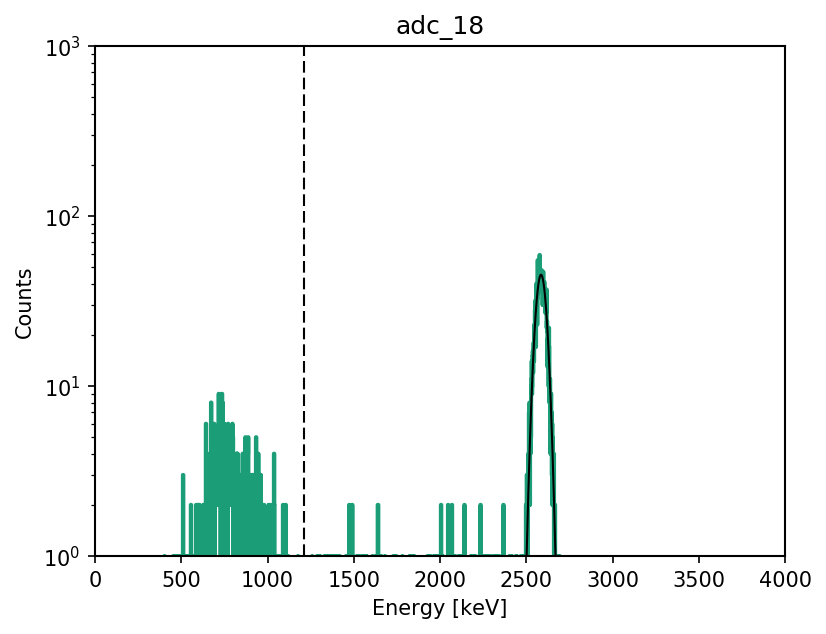

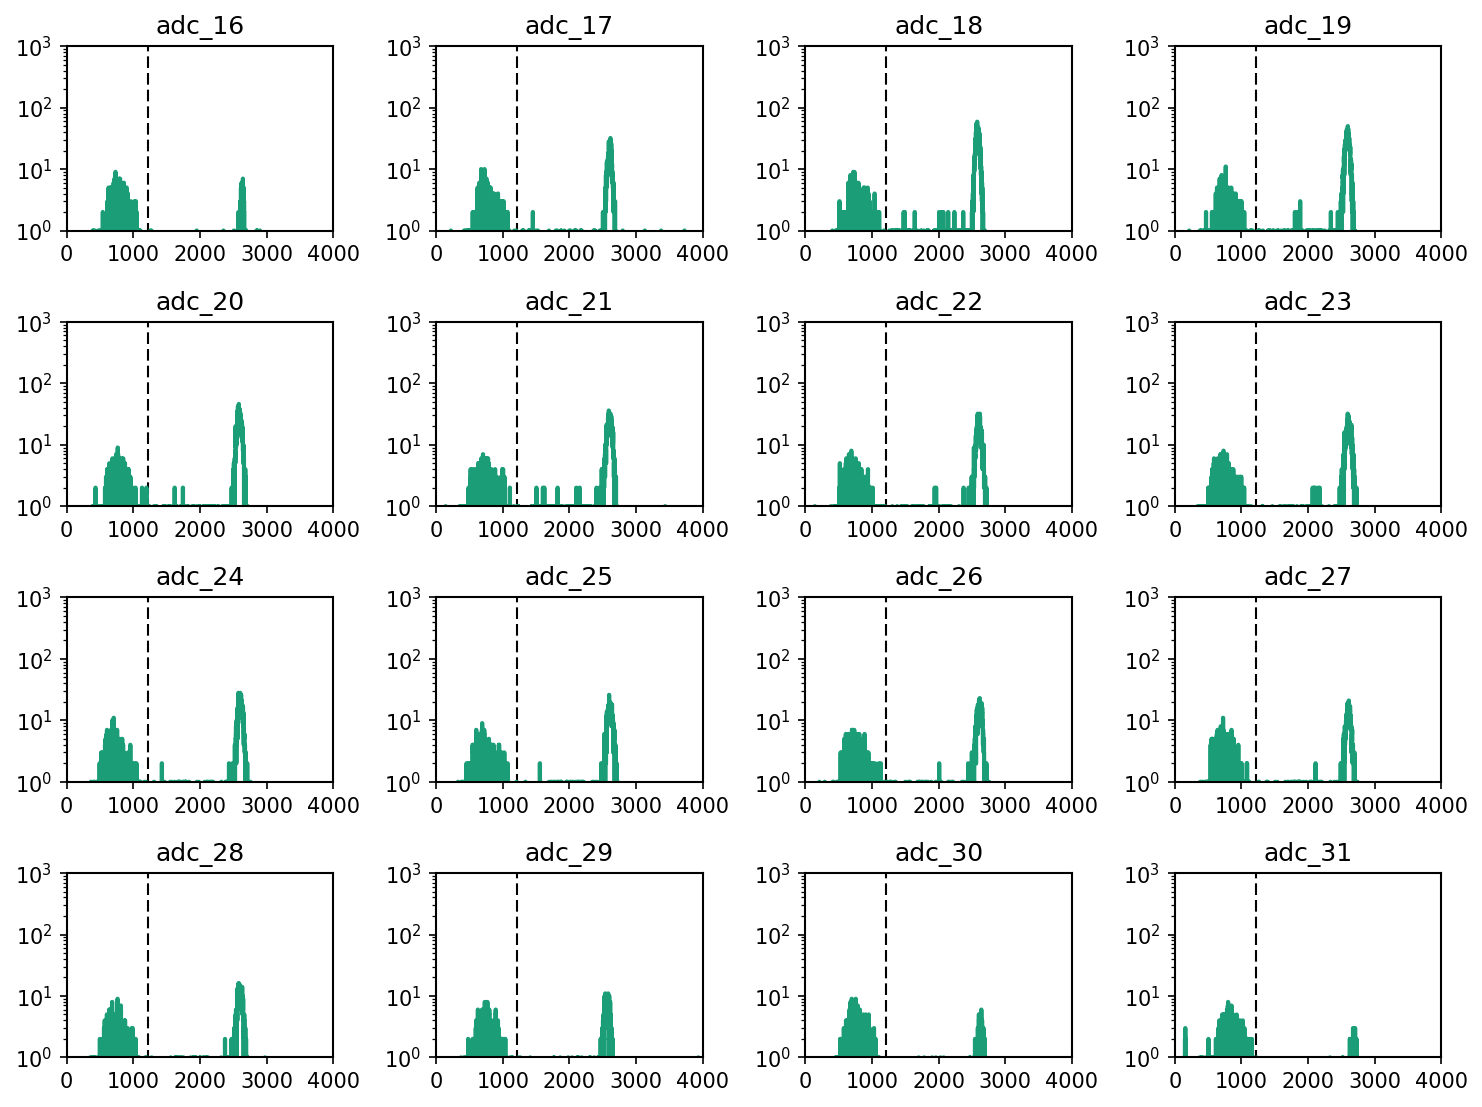

In [38]:
count_totals = []

for data_obj, number, e_p, e_a in zip(data, runs, p_energy, a_energy):
    print('=== RUN {} ==='.format(number),
          'E_p = {:6.4f}, E_a = {:6.4f}'.format(e_p, e_a),
          sep='\n')
    r = sap.Analyzer(data_obj, 'run{}'.format(number))
    d = sap.Display(data_obj)
    window, fit_pars, i = r.determine_energy_window()
    window = (e_p * 1000 * 1.03, 6000)  # lowest energy is full proton energy + 3% from resolution
    fig, ax = d.single_plot(data_obj.adc[i + 16], fit_pars=fit_pars, energy_range=window, figsize=figsize)
    ax.set_ylabel('Counts')
    ax.set_xlabel('Energy [keV]')
    counts = r.get_peak_counts(window)
    count_totals.append(counts)
    full = d.display_array(energy_range=window, ylim=(0, 1000))
    plt.show()

In [39]:
count_totals = np.array(count_totals)
totals = count_totals.sum(axis=1)
totals

array([ 88977, 276654,  80327,  21924,  22285,  31106,  60713, 248637,
        22869,  16572])

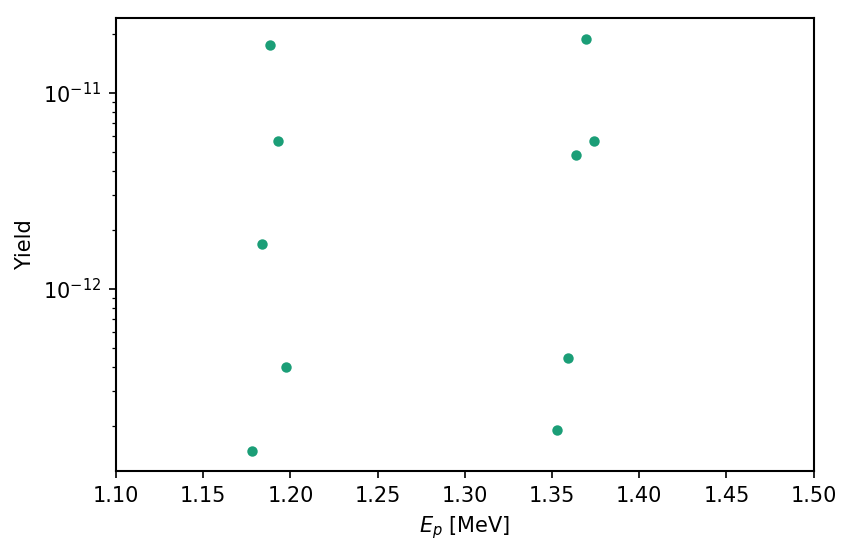

In [40]:
yields = totals / incident_particles
plt.semilogy(p_energy, yields, linestyle='none', marker='.', markersize=10)
plt.xlim(1.1, 1.5)
plt.xlabel(r'$E_p$ [MeV]')
plt.ylabel('Yield')
plt.show()

In [41]:
thickness = 62.5  # ug/cm^2
avogadro = 6.022e23

beam_spot = (6.35e-1)**2  # cm^2, assuing a square
N_target = 1e-6 * thickness * beam_spot * avogadro / 26.98153863  # number
N_target

5.624727761309289e+17

In [42]:
sigma = totals / (incident_particles * N_target) * beam_spot  # cm^2
xs = sigma * 10**24 / 0.04**2 # barns/sr
xs = xs.astype('float64')
xs

array([  2.54888133e-03,   8.41940404e-03,   2.15648993e-03,
         1.97572071e-04,   8.50193801e-05,   1.77732774e-04,
         2.52561267e-03,   7.86075761e-03,   7.60403945e-04,
         6.69019913e-05])

In [43]:
np.isclose(yields, N_target * sigma)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

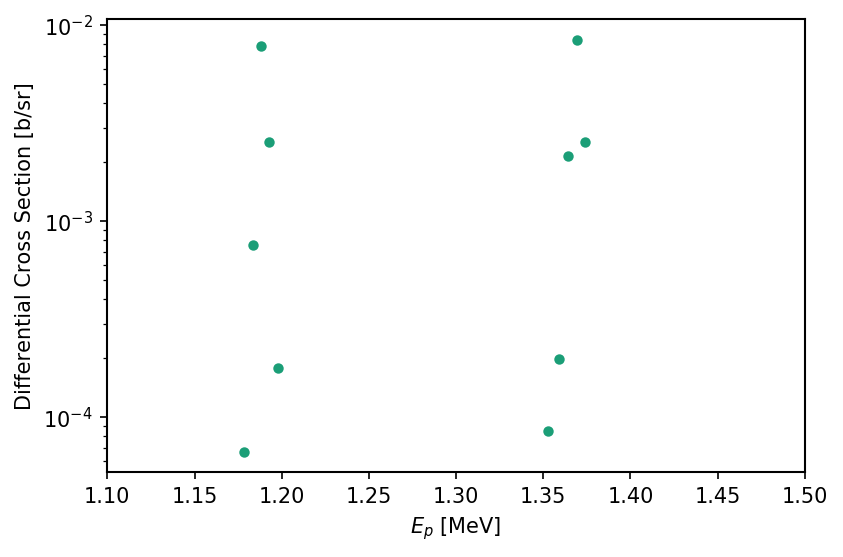

In [44]:
plt.semilogy(p_energy, xs, linestyle='none', marker='.', markersize=10)
plt.xlim(1.1, 1.5)
plt.xlabel(r'$E_p$ [MeV]')
plt.ylabel('Differential Cross Section [b/sr]')
plt.show()

In [45]:
np.savez('../extracted_data/cross_sections.npz', e_p=p_energy, xs=xs)

This is good! Right now, I don't have the $R$-matrix function for alphas at zero degrees plotted, but a quick glance between this and the graph on LOGBOOK Pg 84 shows promise! A few things to note:

- I have narrow peaks, and assumed the cross section was constant over the target thickness. This probably isn't the case, so you need to do something a little more realistic for this.
- We could see the little side peak around E_p = 1.2 MeV had we gone to those energies, which is good to know! Our longest run was about 3 hrs, so the on resonance point for there would take less time. Likewise, the resonance at 1.4 MeV would also be accessible.
- Error bars, not even statistical ones, are not included.

In [20]:
time / 3600

array([ 0.25277778,  0.25166667,  0.27472222,  0.88388889,  2.22111111,
        1.51527778,  0.25194444,  0.25194444,  0.29944444,  1.97305556])

Parameter Check
-----------------

After talking to Manoel, since we have this data, we can see if our resonance energies match up with what we expect, and if the distance between them is what we expect. Resonance parameters are written down in the LOGBOOK Pg 85.

In [21]:
from scipy.optimize import curve_fit

r1, _ = curve_fit(sap.functions.gaussian, p_energy[:5], xs[:5],
                  bounds=(0, np.inf))
r2, _ = curve_fit(sap.functions.gaussian, p_energy[5:], xs[5:],
                  bounds=(0, (np.inf, 1.2, np.inf)))
r1, r2

(array([ 0.00843188,  1.36921251,  0.00316113]),
 array([ 0.00809557,  1.18880505,  0.00248774]))

In [22]:
res_1_e = r1[1]
res_2_e = r2[1]

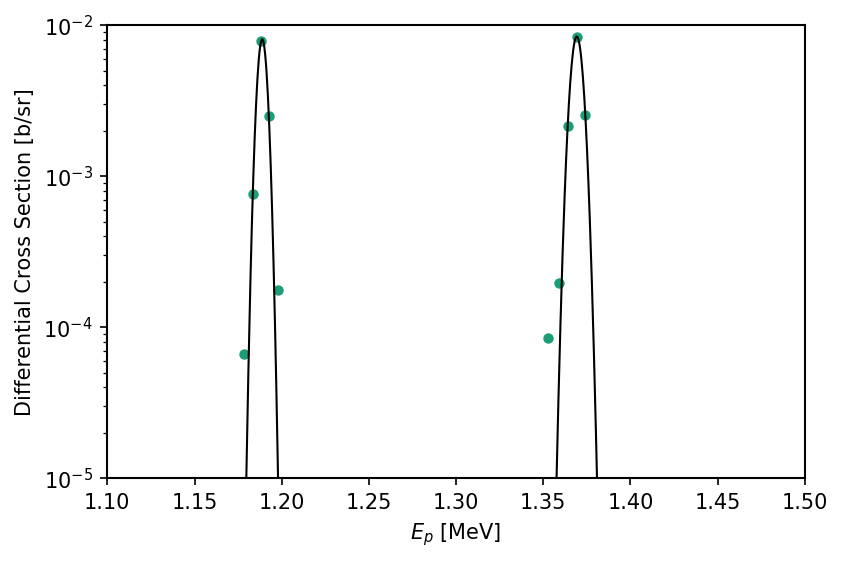

In [23]:
x = np.linspace (1.1, 1.5, 1000)

plt.semilogy(p_energy, xs, linestyle='none', marker='.', markersize=10)
plt.plot(x, sap.functions.gaussian(x, *r1), 'k-', linewidth=1)
plt.plot(x, sap.functions.gaussian(x, *r2), 'k-', linewidth=1)
plt.xlim(1.1, 1.5)
plt.ylim(1e-5, 1e-2)
plt.xlabel(r'$E_p$ [MeV]')
plt.ylabel('Differential Cross Section [b/sr]')
plt.show()

In [24]:
m_p = 1.00782503
m_a = 4.00260325
m_al27 = 26.98153863
m_mg24 = 23.98504170
m_si28 = 27.97692653

amu_MeV = 931.494061  # MeV/c^2
speed_of_light = 299792458.0  # m/s
Q = 11.585

energy_p = np.array([1.369, 1.189])  # MeV
state_energy = m_si28 * (Q + energy_p * (1 - m_p / m_si28)) / m_si28 * 1000
state_energy

array([ 12904.68391574,  12731.16813427])

In [25]:
def breit_wigner(x, E_r, width):
    return width**2 / ((x - E_r)**2 + width**2 / 4)

r1bw, _ = curve_fit(breit_wigner, p_energy[:5], xs[:5],
                    bounds=([1.35, 0], [1.4, 300e-6]))
r2bw, _ = curve_fit(breit_wigner, p_energy[5:], xs[5:],
                    bounds=([1.15, 0], [1.2, 300e-6]))
r1bw, r2bw

(array([  1.37907835e+00,   3.00000000e-04]),
 array([  1.16903089e+00,   3.00000000e-04]))

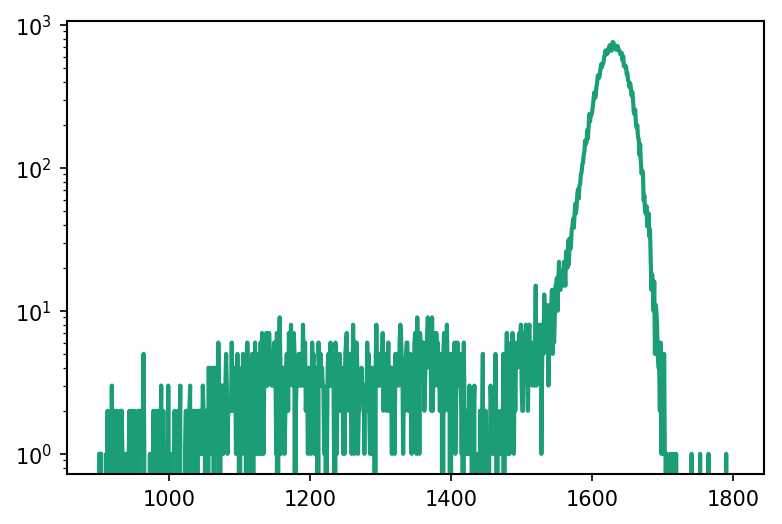

In [26]:
adc = run270.data.adc[23]
plt.semilogy(adc.bins[900:1800], adc.counts[900:1800], nonposy='clip')

In [27]:
adc.counts[0:1450].sum()

1691

In [28]:
adc.counts[1450:].sum()

38531

In [29]:
adc.counts.sum()

40222

In [30]:
r = sap.Analyzer(run270.data, 'run{}'.format(number))
d = sap.Display(run270.data)
window, fit_pars, i = r.determine_energy_window()

lows, peaks = [], []
for adc in r.data.adc[16:]:
#     d.single_plot(data_obj.adc[i + 16], fit_pars=fit_pars, energy_range=window, figsize=figsize)
    bin_cut = np.searchsorted(adc.energies, window)[0]
    lows.append(adc.counts[:bin_cut].sum())
    peaks.append(adc.counts[bin_cut:].sum())

 using det adc_21...


(0, 0.8)

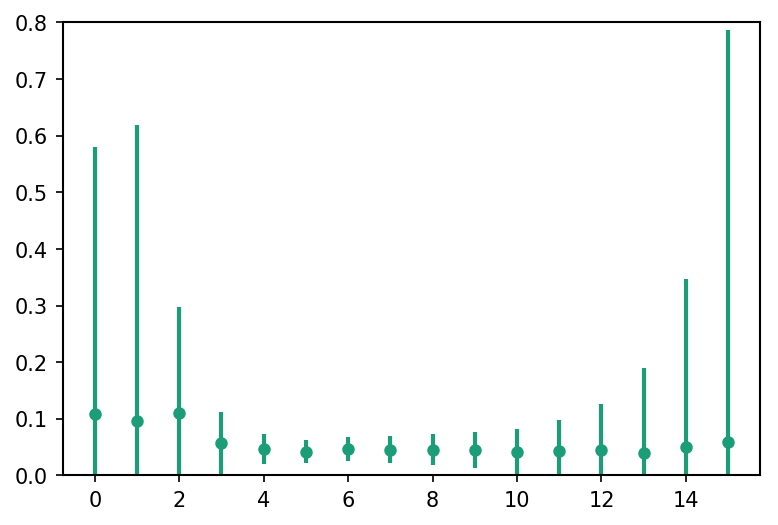

In [31]:
lows = np.array(lows)
highs = np.array(peaks)
sigma = np.sqrt(1 / lows + 1 / highs)

plt.scatter(np.arange(16), lows / highs)
plt.errorbar(np.arange(16), lows / highs, yerr=sigma, fmt='.')
plt.ylim(0, 0.8)

In [32]:
cal = pyne.EVTData('../data_np/run289')
cal.load_data()

reading from ../data_np/run289...


(750, 3350)

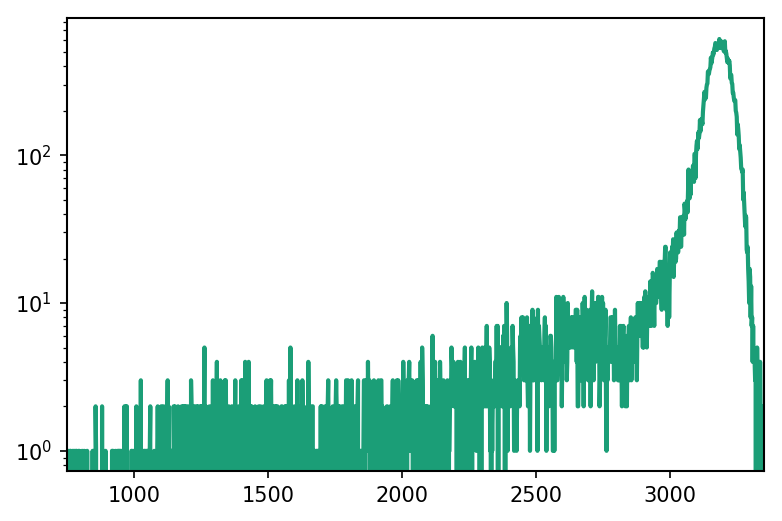

In [33]:
test_adc = cal.adc[23]  # one of the larger resolution ADCs
plt.semilogy(test_adc.energies, test_adc.counts, nonposy='clip')
plt.xlim(750, 3350)  # below looks like noise

In [34]:
low_energy_range = [750, 2800]  # keV
high_energy_range = [2800, 3350]  # keV
low_bin_range = np.searchsorted(test_adc.energies, low_energy_range)
high_bin_range = np.searchsorted(test_adc.energies, high_energy_range)
low_bin_range, high_bin_range

(array([ 515, 1622]), array([1622, 1919]))

In [35]:
lows_cal = []
highs_cal = []
for adc in cal.adc[16:]:
    low_bin_range = np.searchsorted(adc.energies, low_energy_range)
    high_bin_range = np.searchsorted(adc.energies, high_energy_range)
    lbr = slice(*low_bin_range)
    hbr = slice(*high_bin_range)
    lows_cal.append(adc.counts[lbr].sum())
    highs_cal.append(adc.counts[hbr].sum())

(0, 0.8)

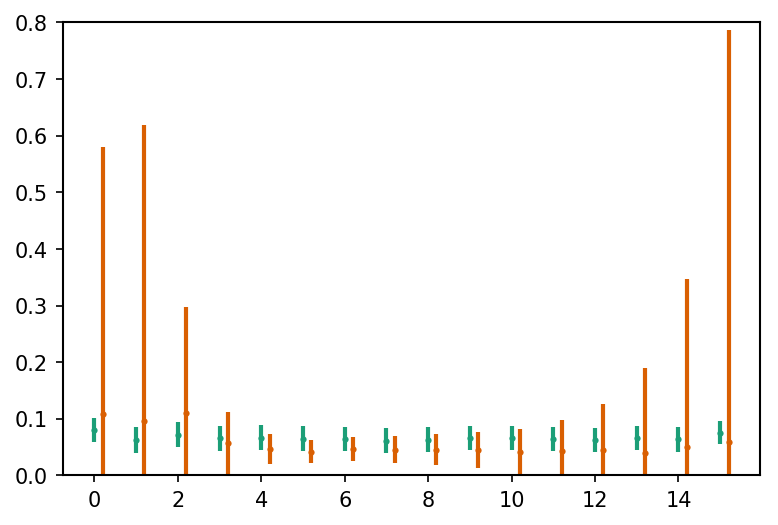

In [36]:
lows_cal = np.array(lows_cal)
highs_cal = np.array(highs_cal)
sigma_cal = np.sqrt(1 / lows_cal + 1 / highs_cal)

# plt.scatter(np.arange(16), lows_cal / highs_cal)
plt.errorbar(np.arange(16), lows_cal / highs_cal, yerr=sigma_cal, fmt='.')
plt.errorbar(np.arange(16) + 0.2, lows / highs, yerr=sigma, fmt='.')
plt.ylim(0, 0.8)